In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing
from typing import List
import itertools

In [2]:
df_wc_day37_1 = pd.read_csv(f"wc_day37_1.csv")
df_wc_day38_1 = pd.read_csv(f"wc_day38_1.csv")
df_wc_day38_2 = pd.read_csv(f"wc_day38_2.csv")
df_wc_day39_1 = pd.read_csv(f"wc_day39_1.csv")
df_wc_day39_2 = pd.read_csv(f"wc_day39_2.csv")
df_wc_day40_1 = pd.read_csv(f"wc_day40_1.csv")
df_wc_day40_2 = pd.read_csv(f"wc_day40_2.csv")
df_wc_day41_1 = pd.read_csv(f"wc_day41_1.csv")
df_wc_day41_2 = pd.read_csv(f"wc_day41_2.csv")

In [3]:
df = pd.concat([
    df_wc_day37_1,
    df_wc_day38_1,
    df_wc_day38_2,
    df_wc_day39_1,
    df_wc_day39_2,
    df_wc_day40_1,
    df_wc_day40_2,
    df_wc_day41_1,
    df_wc_day41_2
])

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [82]:
df_M = df.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()

In [83]:
df_M

,date,Unnamed: 0,count
0,1998-05-31 22:00:00,1711,1914
1,1998-05-31 22:01:00,5310,2558
2,1998-05-31 22:02:00,8910,2394
3,1998-05-31 22:03:00,12510,2052
4,1998-05-31 22:04:00,16110,2366
...,...,...,...
7196,1998-06-05 21:56:00,641550,4995
7197,1998-06-05 21:57:00,645150,5169
7198,1998-06-05 21:58:00,648750,5433
7199,1998-06-05 21:59:00,652350,5303


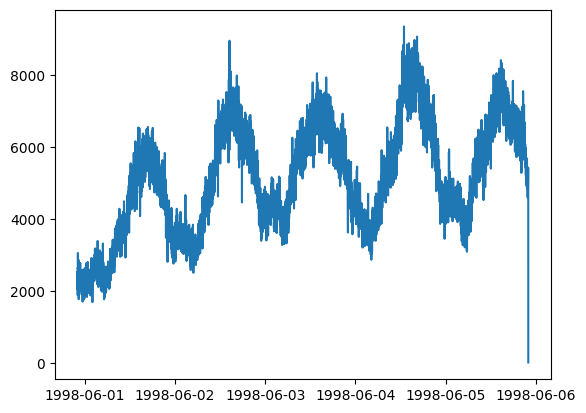

In [84]:
plt.plot(df_M["date"], df_M["count"])

In [9]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [89]:
from numpy import ceil

train = df_M[0:int(ceil(len(df_M)*0.8))]["count"].to_numpy()
test = df_M[int(ceil(len(df_M)*0.8)):len(df_M)]["count"].to_numpy()
assert len(df_M) == len(train) + len(test)
len(train), len(test)

(5761, 1440)

In [86]:
enumerate(range(1, int(ceil(len(test)/120))))

In [120]:
from matplotlib._mathtext import Error

sims = {}
unit = 60
interval = unit * 3
y = []
while True:
    try:
        for j in range(0, len(test)-interval):
            j_sims = []
            for i in range(0, len(train)-interval):
                sim = cos_sim(train[i:i+interval], test[j:j+interval])
                j_sims.append((sim, (i, j)))
            sims[j] = sorted(j_sims)[-4:-1]
            print(f"j# {j}/{len(test)-interval}")
        break
    except Exception as e:
        print(e)
        print(f"finish: {len(sims)}")
        break

j# 0/1260
j# 1/1260
j# 2/1260
j# 3/1260
j# 4/1260
j# 5/1260
j# 6/1260
j# 7/1260
j# 8/1260
j# 9/1260
j# 10/1260
j# 11/1260
j# 12/1260
j# 13/1260
j# 14/1260
j# 15/1260
j# 16/1260
j# 17/1260
j# 18/1260
j# 19/1260
j# 20/1260
j# 21/1260
j# 22/1260
j# 23/1260
j# 24/1260
j# 25/1260
j# 26/1260
j# 27/1260
j# 28/1260
j# 29/1260
j# 30/1260
j# 31/1260
j# 32/1260
j# 33/1260
j# 34/1260
j# 35/1260
j# 36/1260
j# 37/1260
j# 38/1260
j# 39/1260
j# 40/1260
j# 41/1260
j# 42/1260
j# 43/1260
j# 44/1260
j# 45/1260
j# 46/1260
j# 47/1260
j# 48/1260
j# 49/1260
j# 50/1260
j# 51/1260
j# 52/1260
j# 53/1260
j# 54/1260
j# 55/1260
j# 56/1260
j# 57/1260
j# 58/1260
j# 59/1260
j# 60/1260
j# 61/1260
j# 62/1260
j# 63/1260
j# 64/1260
j# 65/1260
j# 66/1260
j# 67/1260
j# 68/1260
j# 69/1260
j# 70/1260
j# 71/1260
j# 72/1260
j# 73/1260
j# 74/1260
j# 75/1260
j# 76/1260
j# 77/1260
j# 78/1260
j# 79/1260
j# 80/1260
j# 81/1260
j# 82/1260
j# 83/1260
j# 84/1260
j# 85/1260
j# 86/1260
j# 87/1260
j# 88/1260
j# 89/1260
j# 90/1260
j# 91/126

In [113]:
sims[1000]

[(0.9975464301194756, (4105, 1000)),
 (0.9975811948517694, (3822, 1000)),
 (0.9976116171382232, (5438, 1000))]

In [136]:
def sims_plot(index: int):
    for plot_idx, index in enumerate(sims[index]):
        idx = index[1]
        plt.subplot(int("31"+str(plot_idx+1)))
        plt.plot(test[idx[1]:idx[1]+interval])
        plt.plot(train[idx[0]:idx[0]+interval])

In [138]:
def pred_plot(index: int):
    for plot_idx, index in enumerate(sims[index]):
        idx = index[1]
        plt.subplot(int("31"+str(plot_idx+1)))
        plt.plot(test[idx[1]+interval:idx[1]+interval+unit])
        plt.plot(train[idx[0]+interval:idx[0]+interval+unit])

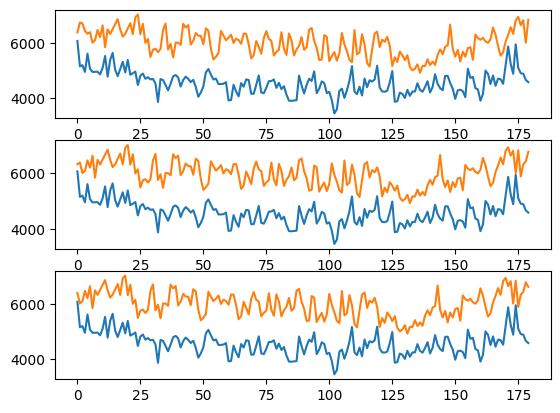

In [137]:
sims_plot(0)

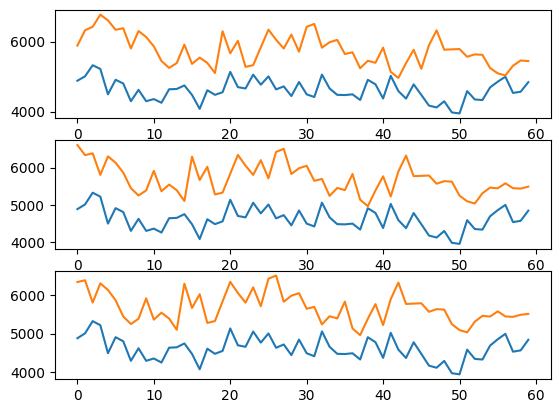

In [139]:
pred_plot(0)

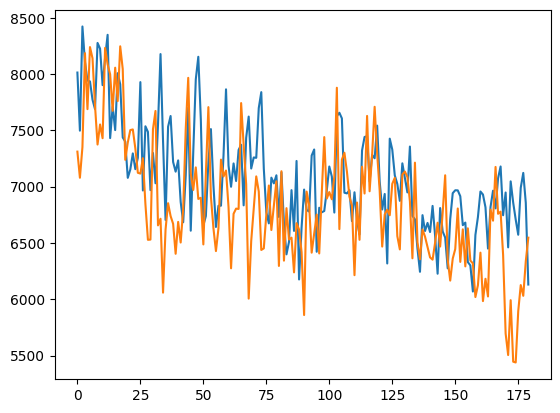

In [123]:
sims_plot(1000)

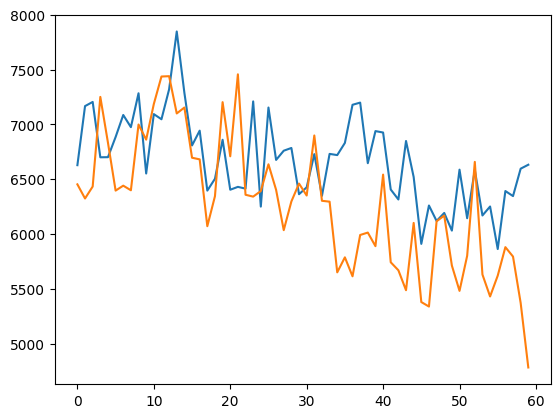

In [125]:
pred_plot(1000)


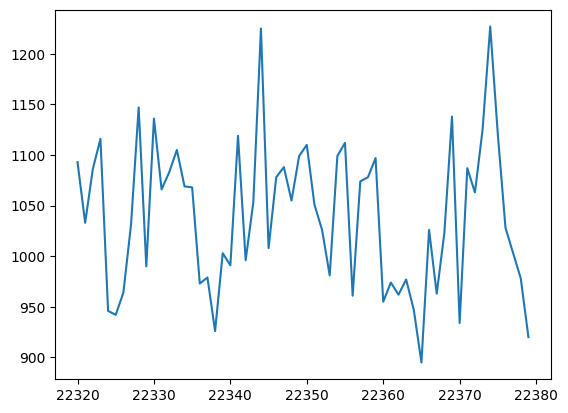

In [33]:
plt.plot(df_10S[(373-1)*interval:373*interval]["count"])

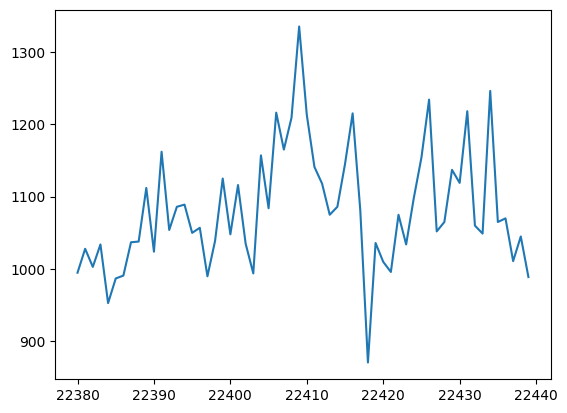

In [34]:
plt.plot(df_10S[(374-1)*interval:374*interval]["count"])

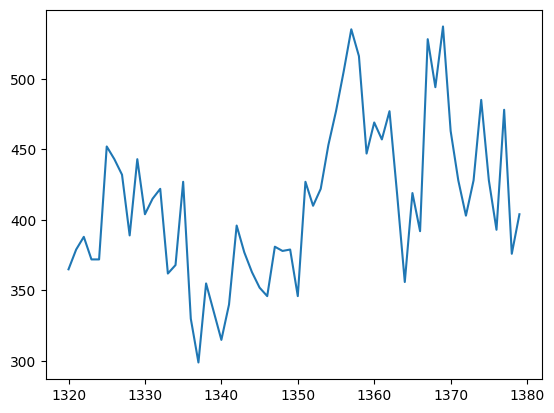

In [35]:
plt.plot(df_10S[(23-1)*interval:23*interval]["count"])

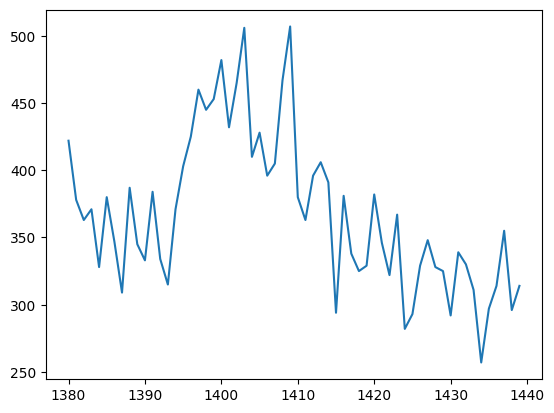

In [36]:
plt.plot(df_10S[(24-1)*interval:24*interval]["count"])